<a href="https://www.kaggle.com/code/shengkunwang/league-of-legends-10-mins-prediction?scriptVersionId=102765262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<img src="https://gamesmea.com/wp-content/uploads/2018/11/IG-810x400.jpg" style="float: right;" width="500" height="100" />



# Winrate Prediction!

# Exploratory Data Analysis  & Prediction!


# Table of contents
***

* [1. Introduction](#1)
* [2. Data set review & preparation](#2)
* [3. Exploratory Data Analysis](#3)
* [4. Outliers](#4)
* [5. Feature engineering](#5)
* [6. Model fitting and selection](#6)
* [7. Conclusion](#7)


# <font color="#00bfff"> 1. Introduction </font>
<a id="1"></a> 
***

**Context**
* League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

**Glossary**
* Warding totem: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.
* Minions: NPC that belong to both teams. They give gold when killed by players.
* Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.
* Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
* Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.
* Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.
* Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.
* Level: Champion level. Start at 1. Max is 18.

**We aim to accomplish the following for this study:**

**1.Identify and visualize which factors contribute to bluewins**

**2.Build a prediction model**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score

# <font color="#00bfff"> 2. Data set review & preparation
<a id="2"></a> 
***    

In [2]:
#Read data frame
df = pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv',delimiter=',')
df.shape

(9879, 40)

**The df has 9879 rows with 40 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling**

In [3]:
#Date cleaning
#Missing value 
missing_values_count = df.isnull().sum()
missing_values_count

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [4]:
#unqiue count
df.nunique()

gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

In [5]:
#Drop some unnecessary columns. e.g. gameId,blue and red team firstblood, blue and red team EliteMonsters etc are unnecessary and repeated
df = df.drop(['gameId','redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds','redDeaths','redTotalGold','redTotalExperience','redAvgLevel'], axis = 1)

In [6]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redTowersDestroyed
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,8,0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,2,1
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,14,0
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,10,0
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,7,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

# <font color="#00bfff"> 3. Exploratory Data Analysis
<a id="3"></a> 
***

**Here our main interest is to get an understanding as to how the given attributes relate to the 'bluewins' status**

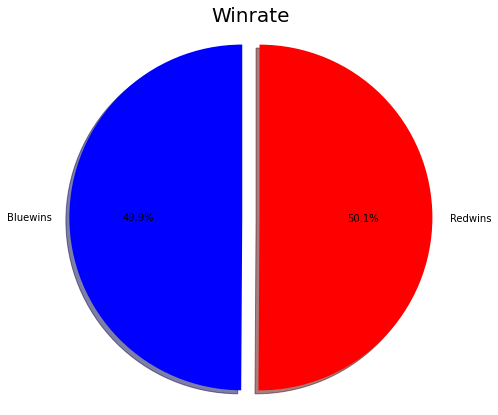

In [8]:
labels = 'Bluewins', 'Redwins'
sizes = [df.blueWins[df['blueWins'] == 1].count(), df.blueWins[df['blueWins'] == 0].count()]
colors = ['b','r']
explode = (0,0.1)
fig1,ax1 = plt.subplots(figsize = (7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')
plt.title("Winrate", size = 20)
plt.show()

**Blue and Red winrates are both close to 50%,hence team assign will not influence winrate**

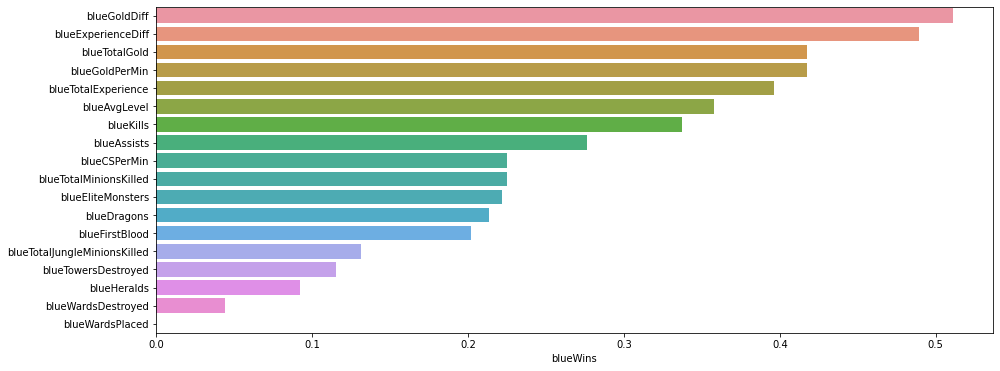

In [9]:
#let's sort correlation of features with blueWins column and drop negetively correlated furture
plt.figure(figsize=(15,6))
dfw = df.corr()['blueWins'].drop(['blueWins','redWardsDestroyed','redWardsPlaced','redTowersDestroyed','redAssists','blueDeaths'])
dfw = dfw.sort_values(ascending=False)
sns.barplot(y=dfw.index, x=dfw)
plt.show()

In [10]:
#Create ranking based on correlation for each feature on scale 0-10, where most important feature gets 10 points.
dfw.apply(lambda x: round(round(20/dfw.max()*x)/2, 1))

blueGoldDiff                    10.0
blueExperienceDiff               9.5
blueTotalGold                    8.0
blueGoldPerMin                   8.0
blueTotalExperience              8.0
blueAvgLevel                     7.0
blueKills                        6.5
blueAssists                      5.5
blueCSPerMin                     4.5
blueTotalMinionsKilled           4.5
blueEliteMonsters                4.5
blueDragons                      4.0
blueFirstBlood                   4.0
blueTotalJungleMinionsKilled     2.5
blueTowersDestroyed              2.5
blueHeralds                      2.0
blueWardsDestroyed               1.0
blueWardsPlaced                  0.0
Name: blueWins, dtype: float64

From the above analysis, gold and experience are two influential features affecting winrate. Kills, Assists and minionsKilled are following closely.

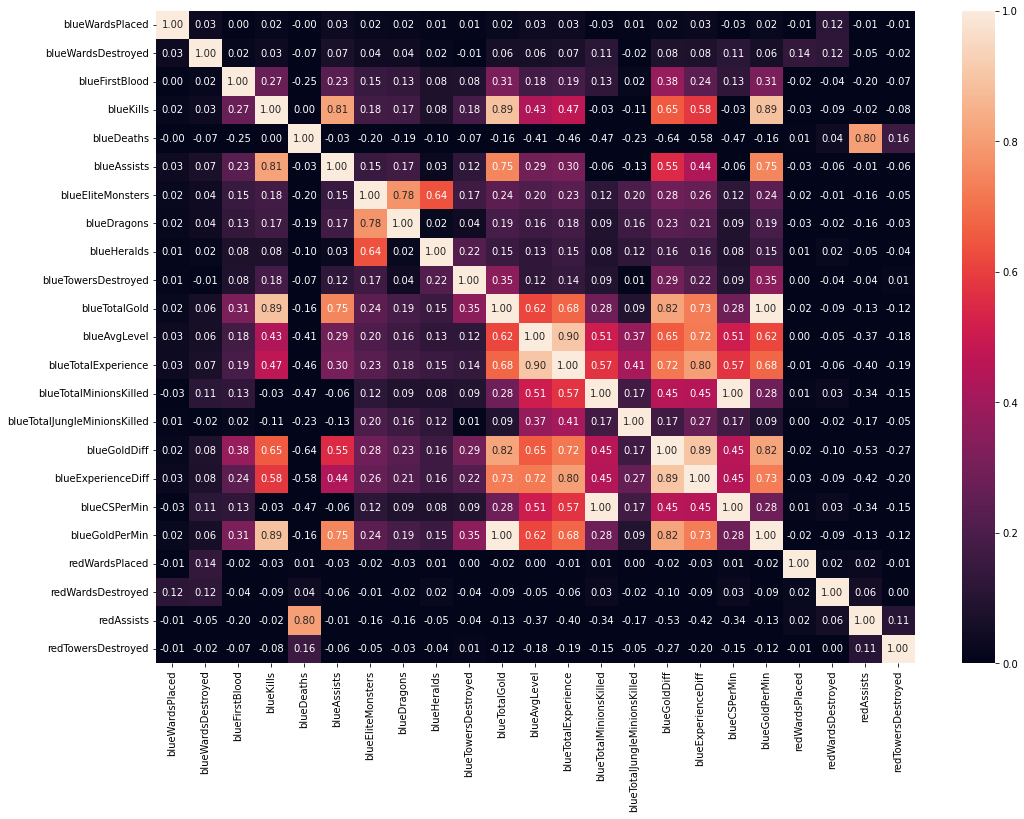

In [11]:
#correlation matrix
plt.figure(figsize=(17, 12))
sns.heatmap(df.drop('blueWins', axis=1).corr(), annot=True, fmt='.2f', vmin=0);

In [12]:
#Based on the correlation matrix, let's clean the dataset a little bit more to avoid colinearity
df = df.drop(['redAssists','blueGoldPerMin','redTowersDestroyed'], axis = 1)

# <font color="#00bfff"> 4. Outliers
<a id="4"></a> 
***

In [13]:
#We note some outliers. We will remove them if judged not relevant.
# blueWardsPlaced
# blueWardsDestroyed
# blueDeath
# blueTowerDestroyed

In [14]:
#Copy
df1 = df.copy()

**BlueWardsPlaced**

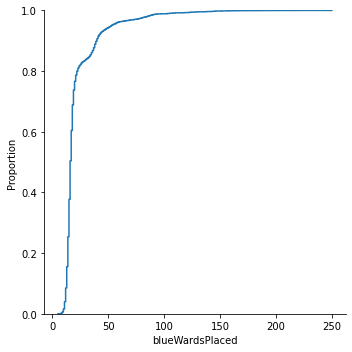

In [15]:
sns.displot(df1['blueWardsPlaced'],kind="ecdf")

We can see in some games,blue players has placed more than 100 within 10 minutes, which is not an usual action. Some players think the game are already lost, placing wards in to wait for the game end due to they cannot surrender within 10 minutes.
We remove any wardplaced more than 100.


In [16]:
#Remove bluewardsplaced more than 100
d1f = df1.loc[df1['blueWardsPlaced'] <= 100]

**blueWardsDestroyed**

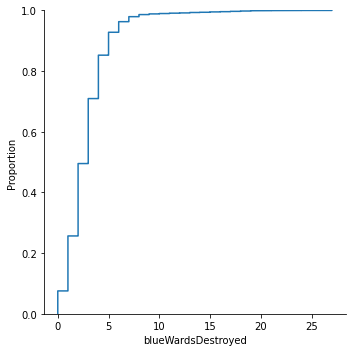

In [17]:
sns.displot(df1['blueWardsDestroyed'],kind="ecdf")

For the same reason above, winning player can have free wards from the losing side once the match goes into garbage time.\
We remove any value over 99%.


In [18]:
#Remove everything above 99%
df1 = df1.loc[df1['blueWardsDestroyed'] <= np.quantile(df1['blueWardsDestroyed'],q=0.99)]

**Blue Deaths**

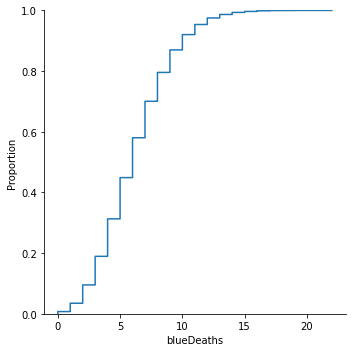

In [19]:
sns.displot(df1['blueDeaths'],kind="ecdf")

In [20]:
df1['blueDeaths'].loc[df1['blueDeaths'] >= 20]

7062    22
Name: blueDeaths, dtype: int64

Based on my personal game experience, 22 deaths in 10 mins is not too rare. Some players are in dark mood they may give free kills after they are camped or solokilled. Besides, if you lane opponent is smurf, you are likely to give many kills. Teammate is an esssential part of the game,we cannot guarrenty every player is perfect, so we do not remove this oultlier.\
*camp: To repeatedly gank the same lane\
*smurf: An experienced player who creates a new account for the purposes of being matched against inexperienced players for easy wins.

In [21]:
# How many games do we remove?
print("We've removed {} outliers".format(df.shape[0] - df1.shape[0]))

We've removed 90 outliers


In [22]:
df1.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,redWardsPlaced,redWardsDestroyed
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,15,6
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,12,1
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,15,3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,15,2
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,17,2


**Since there is no second Dragon or Herald in 10 mins, we can classify bluedragons and blueheralds as categorical varibales**

Same ananlysis for the relationship between winrate and furtures but we use countplot and boxplot to compare the bule winrate change to red winrate.

<AxesSubplot:xlabel='blueTowersDestroyed', ylabel='count'>

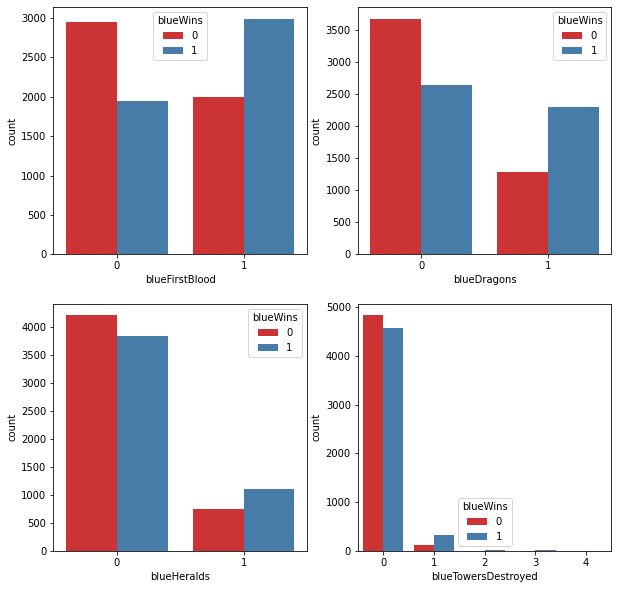

In [23]:
 # We review the 'Status' relation with categorical variables and TowerDestroyed
fig, ax2 = plt.subplots(2,2,figsize = (10,10))
sns.countplot(x='blueFirstBlood', hue = 'blueWins',data = df,palette="Set1", ax=ax2[0][0])
sns.countplot(x='blueDragons', hue = 'blueWins',data = df, palette="Set1", ax=ax2[0][1])
sns.countplot(x='blueHeralds', hue = 'blueWins',data = df, palette="Set1", ax=ax2[1][0])
sns.countplot(x='blueTowersDestroyed', hue = 'blueWins',data = df,palette="Set1",  ax=ax2[1][1])

Blue team have higher winrate when these categorical variables are true.

<AxesSubplot:xlabel='blueWins', ylabel='blueTotalJungleMinionsKilled'>

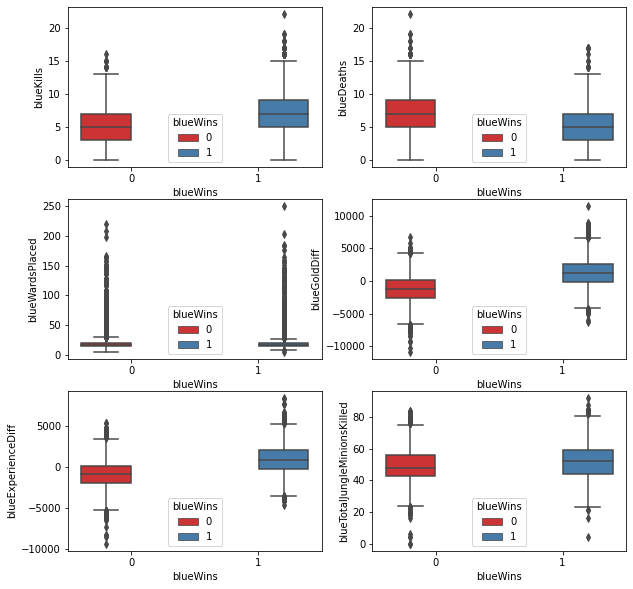

In [24]:
# Relations based on the continuous data attributes
fig,ax3 = plt.subplots(3,2, figsize = (10,10))
sns.boxplot(y='blueKills',x = 'blueWins', hue = 'blueWins',data = df,palette="Set1", ax = ax3[0][0])
sns.boxplot(y='blueDeaths',x = 'blueWins', hue = 'blueWins',data = df,palette="Set1", ax = ax3[0][1])
sns.boxplot(y='blueWardsPlaced',x = 'blueWins', hue = 'blueWins',data = df, palette="Set1",ax = ax3[1][0])
sns.boxplot(y='blueGoldDiff',x = 'blueWins',hue = 'blueWins',data = df,palette="Set1", ax=ax3[1][1])
sns.boxplot(y='blueExperienceDiff',x = 'blueWins',hue = 'blueWins',data = df,palette="Set1", ax=ax3[2][0])
sns.boxplot(y='blueTotalJungleMinionsKilled',x = 'blueWins',hue = 'blueWins',data = df,palette="Set1", ax=ax3[2][1])

# <font color="#00bfff"> 5. Feature engineering
<a id="5"></a> 
***

In [25]:
df1['blueDeaths'].loc[df1['blueDeaths'] == 0] = 0.1

**Since 0 death reflect a significant advantage, we can double this KDA by half the denominator.**\
*KDA = (Kill + Assist)/Death

In [26]:
df1['KDA'] = ((df1.blueKills +df1.blueAssists)/df1.blueDeaths)

In [27]:
# blueward retention ratio can repesent map control
df1 ['bluewardretentionratio'] = (df1.blueWardsPlaced - df1.redWardsDestroyed)/df1.blueWardsPlaced

In [28]:
df_copy = df1.copy()
X_features = df_copy.loc[:, df_copy.columns != 'blueWins']
y_target = df_copy.blueWins
X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size=0.3, random_state=0, stratify=y_target)

In [29]:
X_train.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,redWardsPlaced,redWardsDestroyed,KDA,bluewardretentionratio
1854,11,3,0,2,11.0,1,1,1,0,0,14643,6.8,17019,230,56,-4728,-3668,23.0,28,4,0.272727,0.636364
8865,16,3,0,3,5.0,2,0,0,0,0,15125,6.6,17843,197,80,-712,977,19.7,15,4,1.000000,0.750000
7368,14,1,1,5,3.0,2,1,0,1,0,15358,6.6,17220,223,40,543,-624,22.3,11,2,2.333333,0.857143
6952,14,3,0,5,7.0,2,0,0,0,0,14318,6.6,16916,180,45,-1575,-1224,18.0,14,0,1.000000,1.000000
5869,21,3,1,9,13.0,13,0,0,0,0,17163,6.6,17099,190,31,-2880,-2174,19.0,15,4,1.692308,0.809524


In [30]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [31]:
#Data Standardization
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [32]:
# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

# <font color="#00bfff"> 6. Model fitting and selection
<a id="6"></a> 
***

In [33]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [34]:
# All our models perform well but I will go with Logistic Regression.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.730444
6,Neural Classifier,0.725773
7,Naives Bayes,0.725773
4,Grad B CLF,0.725773
1,SVC,0.723438
5,Rand FC,0.700671
2,KNN,0.670607
3,Dec Tree,0.632954


In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
grad_clf.fit(X_train, y_train)
print(f"Logistic Regression Classifier accuracy is{accuracy_score(y_train, y_train_pred)}")
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier 
print('Recall Score: ', recall_score(y_train, y_train_pred))
print('F1 Score: ', f1_score(y_train, y_train_pred))

Logistic Regression Classifier accuracy is0.7304436660828955
Precision Score:  0.7318007662835249
Recall Score:  0.7260233918128655
F1 Score:  0.728900631146338


In [37]:
log_y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, log_y_scores)

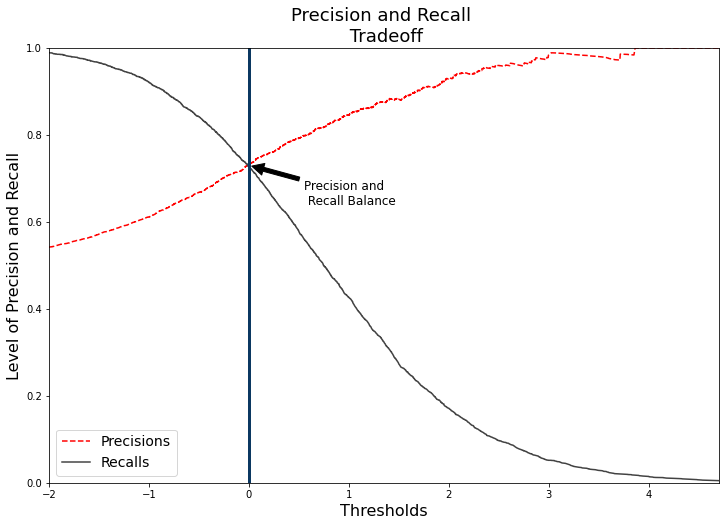

In [39]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0, linewidth=3, color="#0B3861")
    plt.annotate('Precision and \n Recall Balance ', xy=(0, 0.73), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

In [40]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if log_y_scores.ndim == 2:
    log_y_scores = log_y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [41]:
from sklearn.metrics import roc_curve
# Logistic RegressionClassifier
# Neural Classifier
# Naives Bayes Classifier
log_fpr, log_tpr, thresold = roc_curve(y_train, log_y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

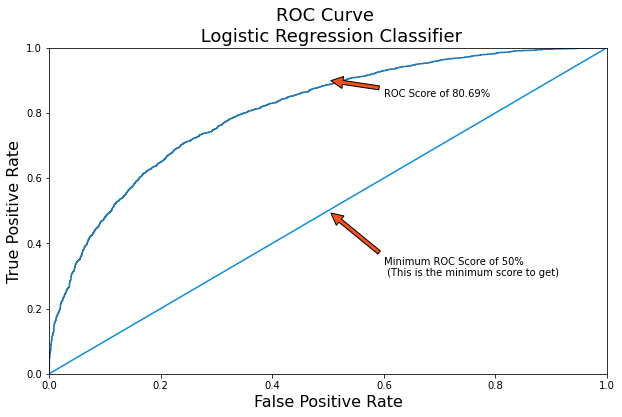

In [42]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Logistic Regression Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 80.69% ', xy=(0.5, 0.9), xytext=(0.6, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(log_fpr, log_tpr, thresold)
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression Classifier Score: ', roc_auc_score(y_train, log_y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Logistic Regression Classifier Score:  0.8070604833762729
Neural Classifier Score:  0.8024130474788369
Naives Bayes Classifier:  0.7910016153437206


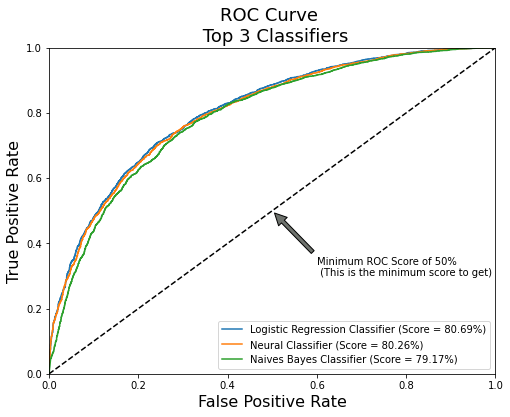

In [44]:
def graph_roc_curve_multiple(log_fpr, log_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier (Score = 80.69%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 80.26%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 79.17%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator. The aggregating criteria can be combined decision of voting for each estimator output. The voting criteria can be of two types:

* Hard Voting: Voting is calculated on the predicted output class.
* Soft Voting: Voting is calculated on the predicted probability of the output class.

In [45]:
# Our three classifiers are log_reg, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('log', log_reg),  ('nav', nav_clf), ('neural', neural_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('nav', GaussianNB()),
                             ('neural', MLPClassifier(alpha=1))])

In [46]:
from sklearn.metrics import accuracy_score

for clf in (log_reg, nav_clf, neural_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

LogisticRegression 0.7313585291113381
GaussianNB 0.7078651685393258
MLPClassifier 0.7262512768130746
VotingClassifier 0.7255703098399727


# <font color="#00bfff"> 7. Conclusion
<a id="7"></a> 
***

# Logistic Regression Wins!
From the test result, our aim is to predict the winner of a game according to the the first 10min in-game data. 
From the review of the models above, the Logistic Regression provide a decent balance of the recall and precision for training set. Although the test data is  lower with regard to predicting, the accuracy could be improved by providing retraining the model with more data over time. Hence,as the game goes on, the prediction accuracy will rise gradually.
